Import relevant notebooks

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import urllib.request

-----------------------------------

Import data

In [35]:
## Import from processed.cleveland.data to get heart disease data
df = pd.read_csv('processed.cleveland.data',
                header=None)

# """
#  ## Import data when not downloaded
#  df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
#                  header=None)
# """

Data is now loaded in a dataframe called "df".

Next, a summary will be loaded.

In [36]:
## Checking the data
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Replacing the column numbers by names, from the UCI repository site:
Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)          - chest pain
4. #10 (trestbps)   - restbp is resting blood pressure
5. #12 (chol)       - serum cholesterol
6. #16 (fbs)        - fasting blood sugar
7. #19 (restecg)    - resting ecg result
8. #32 (thalach)    - maximum heart rate achieved
9. #38 (exang)      - exercise induced angina
10. #40 (oldpeak)   - ST depression induced by ecervise relative to rest
11. #41 (slope)     - slope of the peak exercise ST segment
12. #44 (ca)        - number of major vessels (0-3) colored by fluoroscopy
13. #51 (thal)      - short thalium heart scan
14. #58 (hd)        - predicted diagnosis of heart disease

In [37]:
## Changing column numbers to names
df.columns = ['age',
              'sex',
              'cp',
              'restbps',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
## Print first 5 columns again
df.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


---

Identifying and dealing with missing data either by removing or imputing

In [38]:
## Checking what data the df has
df.dtypes

age        float64
sex        float64
cp         float64
restbps    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [39]:
## check what hapens at 'ca'
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

So, the questionmarks are inserted causing there to be more than 1 data type

In [40]:
## check what happens at 'thal'
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

Here we find the same as before

---

Dealing with missing data

First we count the number of rows with missing data using loc (to find rows) and len (to find the length of the output of loc)

In [41]:
## prints the number of rows under the 'ca' and 'thal' columns that miss data
len(df.loc[(df['ca'] == '?')
          |
          (df['thal'] == '?')])

6

In [42]:
## looking at these rows separately
df.loc[(df['ca'] == '?')
        |
        (df['thal'] == '?')]

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [43]:
## checking the number of rows in the whole dataset
len(df)

303

In [44]:
print(str(round((len(df.loc[(df['ca'] == '?')
                            |
                            (df['thal'] == '?')]) 
                            / len(df)) * 100, 2)) + '% of the rows contains missing data')

1.98% of the rows contains missing data


Considering it is only two procent of the rows that misses data, these can be removed without affecting the model too much;
this leaves the analysis with 303 - 6 = 297 rows to build a Decision Tree on.

In [45]:
## creating a new DataFrame that excludes rows that miss data
df_nm = df.loc[(df['ca'] != '?')
               &
               (df['thal'] != '?')]

In [46]:
len(df_nm)

297

In [47]:
df_nm['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [48]:
df_nm['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

Now we are sure the data set does not contain missing values, though, the data types are still objects

---

Splitting data into the dependent and independent variables

In [49]:
## Copying the X data in
X = df_nm.drop('hd', axis=1).copy()

# Alternatively:
# X = df_nm.iloc[:,:-1]

X.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [50]:
## Copying the y data in
y = df_nm['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

---

Separating data in floats and categories

In [51]:
X.dtypes

age        float64
sex        float64
cp         float64
restbps    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

age, restbp, chol and thalach are correctly labelled float, but the rest are categorical and treated as continuous

For example, if we treat 'chest pain' as floats, the classification '1' (typical angina) and '3' (non-anginal pain) are assumed to be equally distinct from eachother as '2' (atypical angina) and '4' ('asymptomatic') but less so than '1' and '2' or '3' and '4'; these are quantifications that we cannot make and therefore we see them as distinct but equal clategories (or classes)

Looking at cp,

In [52]:
X['cp'].unique()

array([1., 4., 3., 2.])

Using get_dummies() for One-Hot Encoding -- note that ColumnTransformer() from scikit-learn is also an option

In [53]:
## testing get_dummies()
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [54]:
## changing all categorical columns into separate ones
X_encoded = pd.get_dummies(X, columns=['cp',
                                       'restecg',
                                       'slope',
                                       'thal'])
X_encoded.head()

,age,sex,restbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


Checking y

In [55]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

Whether the patient has heart disease will be turned into a yes/no question;
here '0' indicates no heart disease,
so, > 0 indicates a heart disease (with varying classifications)

In [78]:
## Reformatting the y-data
y[y > 0] = 1
y.unique()

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: hd, Length: 297, dtype: int64

---

Building unoptimised (preliminary) classification tree

In [57]:
## splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

## create a decision tree and fit it on the training data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

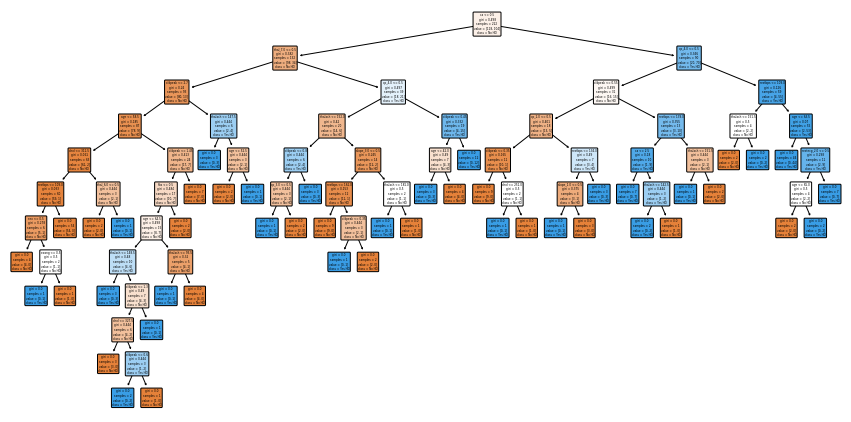

In [58]:
## plot the tree
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns);

Using a confusion matrix on the test dataset

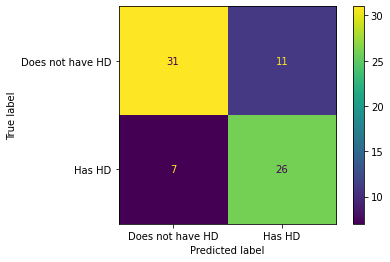

In [59]:
## creates a confusion matrix to see false +ves and -ves
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

Might need pruning to solve overfitting

---

Cost Complexity Pruning

In [60]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

## create decision trees for each alpha (sum of squared residuals?)
for ccp_alpha in ccp_alphas:
        clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        clf_dt.fit(X_train, y_train)
        clf_dts.append(clf_dt)

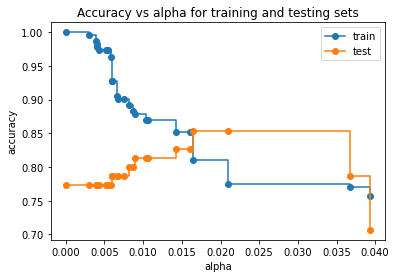

In [61]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

---

Using cross validation

<AxesSubplot:xlabel='tree'>

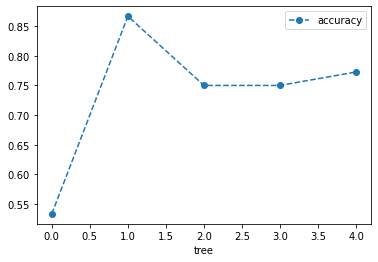

In [62]:
## decision tree with found alpha=0.016
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

## cross validating using 5-fold validation
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

## plotting the accuracy against generated trees
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<AxesSubplot:xlabel='alpha'>

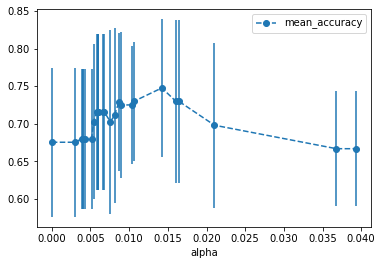

In [63]:
## generating different accuracies for each alpha
## to confirm the needed alpha value
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])


alpha_results= pd.DataFrame(alpha_loop_values,
                            columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                  y='mean_accuracy',
                  yerr='std',
                  marker='o',
                  linestyle='--')

In [64]:
## finding the poin alpha in range [0.014; 0.015]
alpha_results[(alpha_results['alpha'] > 0.014)
              &
              (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [67]:
## storing the ideal alpha
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014)
                              &
                              (alpha_results['alpha'] < 0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [69]:
## converting ideal alpha to float from series
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

We can now generate the correct clf tree

---

Building, Evaluating, Drawing and Interpreting the Final Classification Tree

In [71]:
## Creating the final decision tree with found alpha
clf_dt_pruned = DecisionTreeClassifier(random_state=42,
                                      ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

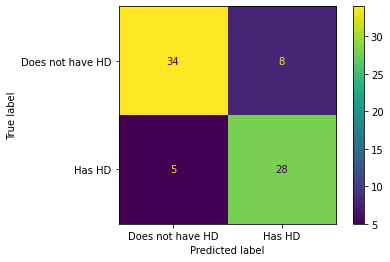

In [73]:
## plotting a confusion matrix for validation
plot_confusion_matrix(clf_dt_pruned,
                      X_test,
                      y_test,
                      display_labels=["Does not have HD", "Has HD"])

The pruned tree has better accuracy (less false +ves and +ves) than the full-sized tree

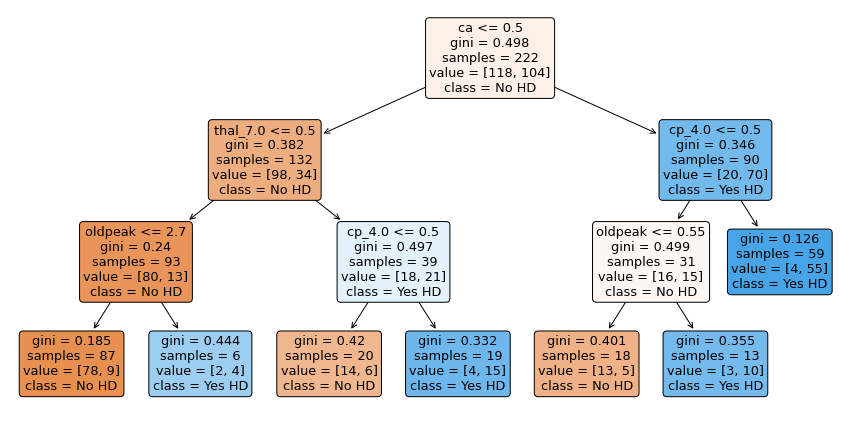

In [77]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns);

DONE: Final decision tree :)